# Data

People turn to data in order to tell a story, or solve a problem. Typically, we start with a question, and then look to data for answers. Whenever you look at data, it is important to be open to unexpected patterns, explanations, and unusual results. Sometimes the most interesting stories to be told with data are not ones we are set out to tell.

## What is data?

Data is used to described things by assigning a value ot them. The values are then organized processed, and presented within a given context so that it becomes useful. Data can be in two different forms: qualitiative and quantitative.

### Dataset Description

This list of websites are from three black list: + machinelearning.inginf.units.it/data-andtools/hidden-fraudulent-urls-dataset + malwaredomainlist.com + zeuztacker.abuse.ch. From them we got around 185181 URLs, we supposed that they were malicious according to their information. We got the benign URLs (345000) from https://github.com/faizann24/Using-machinelearning-to-detect-malicious-URLs.git.

| Variable | Type | Description |
|----------|------|-------------|
| URL  | Qualitiative| uniform resource locator |
| URL_LENGTH | Quantitative | number of characters in the URL |
| NUMBER_SPECIAL_CHARACTERS | Quantitative | number of special characters in the URL (“/”, “%”, “#”, “&”, “. “, “=”) |
| CHARSET | Qualitative | character encoding standard |
| SERVER | Qualitative | operative system of the server from the packet response |
| CONTENT_LENGTH | Quantiative | represents the content size of the HTTP header |
| WHOIS_COUNTRY | Qualitative | countries we got from the server response |
| WHOIS_STATEPRO | Qualitative | the states we got from the server response |
| WHOIS_REGDATE | Quantitative| server registration date, with format DD/MM/YYY HH:MM |
| WHOIS_UPDATED_DATE | Quantitative | last update date from the server |
| TCP_CONVERSATION_EXCHANGE | Quantitative | number of TCP packets exchanged between server & honeypot client |
| DIST_REMOTE_TCP_PORT | Quantitative | number of the ports detected and different to TCP |
| REMOTE_IPS | Quantitative | total number of IPs connected to the honeypot |
| APP_BYTES | Quantitative | number of bytes transfered |
| SOURCE_APP_PACKETS | Quantitative | number of packets sent from the honeypot to the server |
| REMOTE_APP_PACKETS | Quantitative | number of packets received from the server |
| APP_PACKETS | Quantitative | number of IP packets generated between the honeypot and the server |
| DNS_QUERY_TIMES | Quantiative | number of DNS packets generated between the honeypot and the server |
| TYPE | Qualitative | type of web page, 1 is for malicious and 0 is for benign |

References: 
Urcuqui, C., Navarro, A., Osorio, J., & Garcıa, M. (2017). Machine Learning Classifiers to Detect Malicious Websites. CEUR Workshop Proceedings. Vol 1950, 14-17.
https://github.com/urcuqui/WhiteHat/tree/master/Research/Web%20security

## Quanitative Data

Quantitative data are measures of values or counts and are expressed as numbers. Quantitative data are data about numeric variables (e.g. how many; how much; or how often). Summarizing quantiative data in a single value inevitably loses a lot of information held in variation within the data. Understanding this variation may be key to working out the story the data may tell, and deciding how to analyze and visualize it. Often the first thing to do when examining a dataset is to chart the distribution of each continuous variable. You can think of this as the “shape” of the dataset, for each variable.

Many variables, such as human height and weight, follow a “normal” distribution. If you draw a graph plotting the range of values in the data along the horizontal axis (also known as the X axis), and the number of individual data points for each value on the vertical or Y axis, a normal distribution gives a bell-shaped curve.

In [1]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/dataset.csv')

One simple way to determine a quantitative variable is to use `info()` in order to see what information is defined as a `int` or `float`. This does not always work as you can have numbers represented as strings.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

## Measures of Central Tendency

The measures of central tendency are metrics that represent an answer to the following question: "What does the middle of our data look like?". The word `middle` is vague because there are multiple definitions we can use to represent the middle.

* Mean
* Median 
* Mode
* Range/Interquartile Range
* Standard Deviation
* Variance

## Mean

The mean is a descriptive statistics that looks at the average value of data. The mean represents a typical observation in our data set. If we were to pick one of our observations at random, then we're likely to get a valuve that's close to the mean.

In [3]:
df[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE',
   'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
   'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS']].mean()

URL_LENGTH                      56.961258
NUMBER_SPECIAL_CHARACTERS       11.111735
CONTENT_LENGTH               11726.927761
TCP_CONVERSATION_EXCHANGE       16.261089
DIST_REMOTE_TCP_PORT             5.472768
REMOTE_IPS                       3.060640
APP_BYTES                     2982.339135
SOURCE_APP_PACKETS              18.540146
REMOTE_APP_PACKETS              18.746210
SOURCE_APP_BYTES             15892.545761
REMOTE_APP_BYTES              3155.598540
APP_PACKETS                     18.540146
dtype: float64

The average length of a url is `URL_LENGTH` is 56.961258. This tells us that the length of most urls are decently long. Let's demonstrate if this is true.

In [11]:
import random
x = random.randint(1,101)

df.iloc[x]['URL_LENGTH']

20

There are multiple types of means, but this form is the most common use. This mean is referred to as the `arithmetic mean` since we are summing up the values.

## Median

The next measure of central tendency we'll cover is the median. The median also attempts to define a typical value in the dataset, but unlike mean, does not require calculation. To find the median, we first need to reorganize our dataset in ascending order. Then, the median is the value that coincides with the middle of the dataset. If there are an even amount of items, then we take the average of the two values that would `surround` the middle.

In [12]:
df[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE',
   'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
   'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS']].median()

URL_LENGTH                     49.0
NUMBER_SPECIAL_CHARACTERS      10.0
CONTENT_LENGTH               1853.0
TCP_CONVERSATION_EXCHANGE       7.0
DIST_REMOTE_TCP_PORT            0.0
REMOTE_IPS                      2.0
APP_BYTES                     672.0
SOURCE_APP_PACKETS              8.0
REMOTE_APP_PACKETS              9.0
SOURCE_APP_BYTES              579.0
REMOTE_APP_BYTES              735.0
APP_PACKETS                     8.0
dtype: float64

The median url length is lower than the mean. The difference between mean and median is due to robustness.

## The Problem of Outliers

The mean is calculated by summing up all the values we want and dividng by the numbe rof items, while the median is found by simply rearranging items. If we have outliers in our data, items that are much higher or lower than the other values, it can have an adverse effect on the mean. The mean is not `robust` to outliers. The median is robust to them. Let's examine the maximum and minimum values in our dataset.

In [14]:
df[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE',
   'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
   'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS']].max()

URL_LENGTH                       249.0
NUMBER_SPECIAL_CHARACTERS         43.0
CONTENT_LENGTH                649263.0
TCP_CONVERSATION_EXCHANGE       1194.0
DIST_REMOTE_TCP_PORT             708.0
REMOTE_IPS                        17.0
APP_BYTES                    2362906.0
SOURCE_APP_PACKETS              1198.0
REMOTE_APP_PACKETS              1284.0
SOURCE_APP_BYTES             2060012.0
REMOTE_APP_BYTES             2362906.0
APP_PACKETS                     1198.0
dtype: float64

In [15]:
df[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE',
   'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
   'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS']].min()

URL_LENGTH                   16.0
NUMBER_SPECIAL_CHARACTERS     5.0
CONTENT_LENGTH                0.0
TCP_CONVERSATION_EXCHANGE     0.0
DIST_REMOTE_TCP_PORT          0.0
REMOTE_IPS                    0.0
APP_BYTES                     0.0
SOURCE_APP_PACKETS            0.0
REMOTE_APP_PACKETS            0.0
SOURCE_APP_BYTES              0.0
REMOTE_APP_BYTES              0.0
APP_PACKETS                   0.0
dtype: float64

We now know that outliers are present in our data. Outliers can represent interesting events or errors in out data collection, so it's important to be able to recognize when they're present in the data. The comparison of median and mode is just one of many ways to detect the present of outliers, visualizaution is typically quicker.

## Mode

The mode is defined as the value that appears the most frequently in the data. The intuition of the mode as the `middle` is not as immediate as mean or median. If a value towards the modal value. The more a value appears, the more it will influence the mena. A mode represents the highest weighted contrributing factor to our mean.

In [16]:
df[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE',
   'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
   'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS']].mode()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS
0,39,9,324.0,0,0,0,0,0,0,0,0,0


The modes are not reasonably close to the median, causing us to lose confidence in that both the median and mode do not fully help us represent the data. The measure of central tendency are useful for summarizing what an average observation is like in our data. However, they do not inform us as to how spread out are data is. There summaries of spread are what measures of spread help describe.

## Measures of Spread

The measures of spread answers the question, `How much does my data vary?` There are few things in the world that stay the same everytime we observe it. This variability makes the world fuzzy and uncertain, so it's useful to have metrics that summarize this fuzzines.

### Range and Interquartile Range

The first measure of spread we’ll cover is range. Range is the simplest to compute of the measures we’ll see: just subtract the smallest value of your data set from the largest value in the data. We found out what the minimum and maximum values of our variables were when we were investigating the median, so we’ll use these to find the range.

In [17]:
df['URL_LENGTH'].max() - df['URL_LENGTH'].min()

233

We found a range of 233, but what does that mean precisely? When we look at our various measures, it is important to keep all of this information in the context of your data. Our median `url_length` was 49. The range is larger than our median, so it suggests that our data is spread out. Perhaps if we had another data set, we could compare the ranges of these two data sets to gain an understanding on how they differ. Otherwise, the range alone isn’t super helpful. More often, we’ll want to see how much our data varies from the typical value. This summary falls under the jurisdiction of standard deviation and variance.

### Standard Deviation

The standard deviation is also a measure of the spread of your observations, but is a statement of how much your data deviates from a typical data point. That is to say, the standard deviation summarizes how much your data differs from the mean. This relationship to the mean is apparent in standard deviation’s calculation. 

In [18]:
df['URL_LENGTH'].std()

27.555585567092216

The results are expected. The followers range from 16 to 249 making the standard deviation large. The larger the standard deviation, the more spread out the data is around the mean and vice-versa. Variance is closely related to standard deviation

### Variance

Variance and standard deviation are almost the exact same thing! Variance is just the square of the standard deviation. Likewise, variance and standard deviation represent the same thing — a measure of spread — but it’s worth noting that the units are different. Whatever units your data are in, standard deviation will be the same, and variation will be in that units-squared.

Like the mean, variance and standard deviation are affected by outliers. Many times, outliers are also points of interest in our data set, so squaring the difference from the mean allows us to point out this significance. More often than not, any statistical analyses you do will require just the mean and standard deviation, but the variance still has significance in other academic areas. The measures of central tendency and spread allow us to summarize key aspects of our data set, and we can build on these summaries to glean more insights from our data.

In [19]:
df['URL_LENGTH'].var()

759.3102959453407

## Qualitative Data

The most basic operation with cateogircal data is to aggregate it by counting the number of records that fall into each category. This gives a table of "frequencies". Often these are divided by the total number of records, and then multiplied by 100 to show them as percentages of the total. Here in this example

We rely on the `value_counts` function to receive the frequency of each unique value in the column

In [20]:
df['WHOIS_COUNTRY'].value_counts()

US                1103
None               306
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
CN                  10
IN                  10
UK                  10
FR                   9
CZ                   9
NL                   6
CH                   6
KR                   5
[u'GB'; u'UK']       5
ru                   4
PH                   4
BS                   4
AT                   4
KY                   3
SE                   3
BE                   3
SC                   3
TR                   3
DE                   3
HK                   3
us                   3
IL                   2
SI                   2
UY                   2
Cyprus               2
RU                   2
UA                   2
KG                   2
BR                   2
NO                   2
LU                   1
LV                   1
United Kingdom       1
PK                   1
IT                   1
TH         

This is a large dataset to view, lets just examine the 5 highest frequencies.

In [21]:
df['WHOIS_COUNTRY'].value_counts().nlargest(5)

US      1103
None     306
CA        84
ES        63
AU        35
Name: WHOIS_COUNTRY, dtype: int64

Lets visualize this information.

<AxesSubplot: >

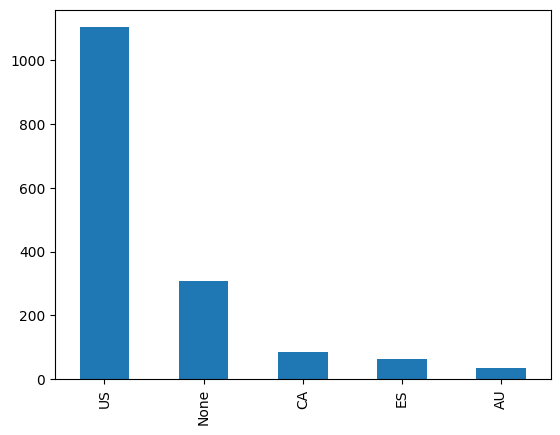

In [22]:
df['WHOIS_COUNTRY'].value_counts().nlargest(5).plot.bar()

In order to see the percetanges, we will use a pie plot to visualize this information.

<AxesSubplot: ylabel='WHOIS_COUNTRY'>

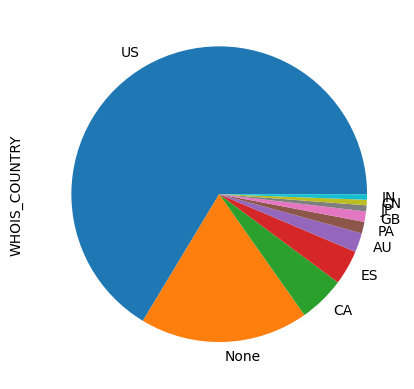

In [23]:
df['WHOIS_COUNTRY'].value_counts().nlargest(10).plot.pie()

Creating frequency counts from qualitative data creates a new quantitative variable, and has changed the level of analysis. The original data would consist of a huge table with a record for each author in creating the frequency data shown here, the level of analysis is shifted from the individual to the class.

### Exercise

Take the dataset (data/dataset.csv) provided and answer the following statements below:
* Obtain mean, median, mode, range, standard deviation, and variance of the frequency of State response (
* Choose a way to visualize any outliers your find in this dataset
* Describe what this means for our data

In [24]:
df[df['Type'] == 1].SERVER.value_counts()

Apache                                                                                       91
nginx                                                                                        49
Apache/2.2.14 (FreeBSD) mod_ssl/2.2.14 OpenSSL/0.9.8y DAV/2 PHP/5.2.12 with Suhosin-Patch    13
Microsoft-IIS/6.0                                                                            12
nginx/1.12.0                                                                                  7
cloudflare-nginx                                                                              6
Apache/2.2.22 (Debian)                                                                        5
Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4                                    4
nginx/1.10.1                                                                                  4
nginx/1.8.0                                                                                   3
Microsoft-HTTPAPI/2.0                   